In [1]:
from tensorflow.keras import utils

train_ds = utils.image_dataset_from_directory('datasets', image_size=(1080, 1920), shuffle=False)

2024-01-04 05:13:53.967813: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 444 files belonging to 2 classes.


2024-01-04 05:13:55.801914: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-04 05:13:55.816428: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-04 05:13:55.816684: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-04 05:13:55.817877: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-04 05:13:55.818057: I tensorflow/compile

In [2]:
class_names = train_ds.class_names
class_names

['defeat', 'victory']

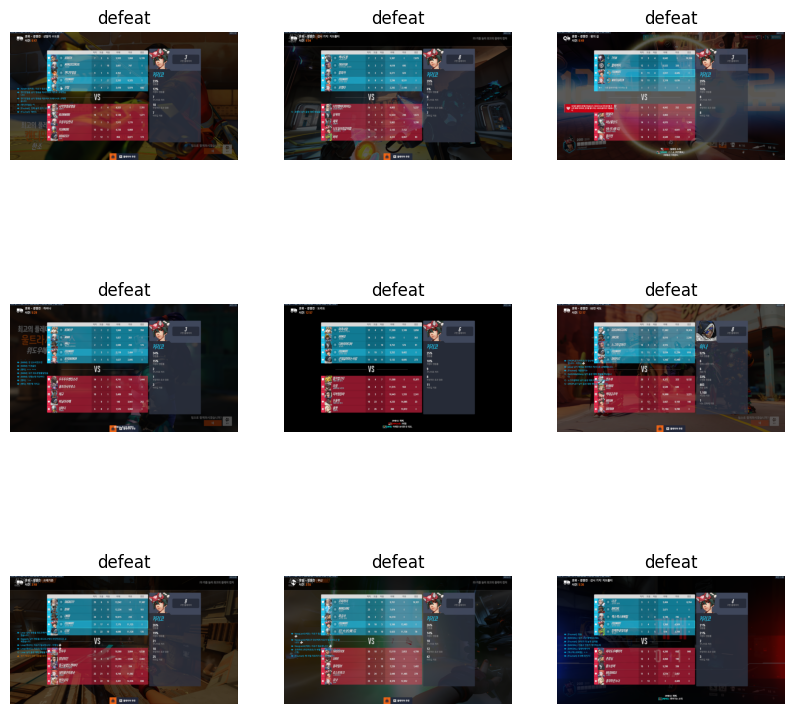

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

(-0.5, 1059.5, 769.5, -0.5)

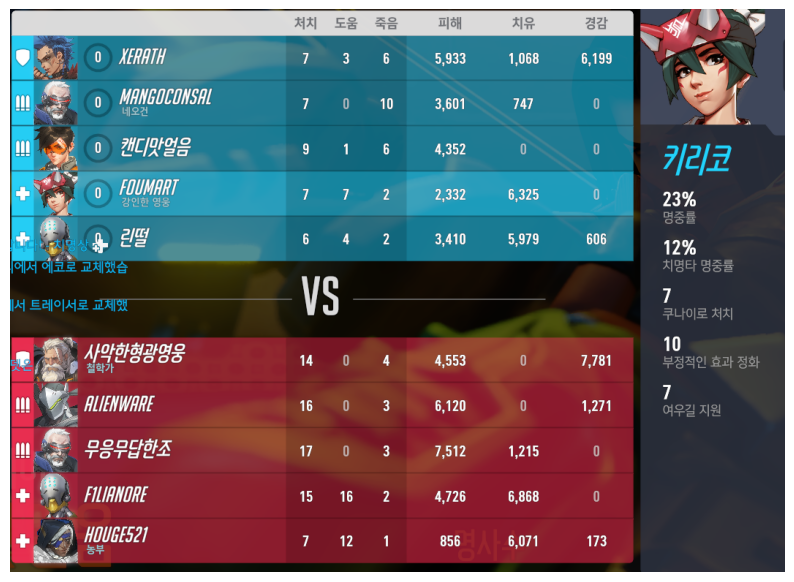

In [4]:
from tensorflow import image

offset_height, offset_width, target_height, target_width = 160, 310, 770, 1060
cropped = image.crop_to_bounding_box(
    images[0].numpy().astype('uint8'), offset_height, offset_width, target_height, target_width
)
plt.figure(figsize=(10, 10))
plt.imshow(cropped)
plt.axis('off')

In [5]:
multiplier = .5
size = (int(cropped.shape[0] * multiplier), int(cropped.shape[1] * multiplier))
size

(385, 530)

(-0.5, 529.5, 384.5, -0.5)

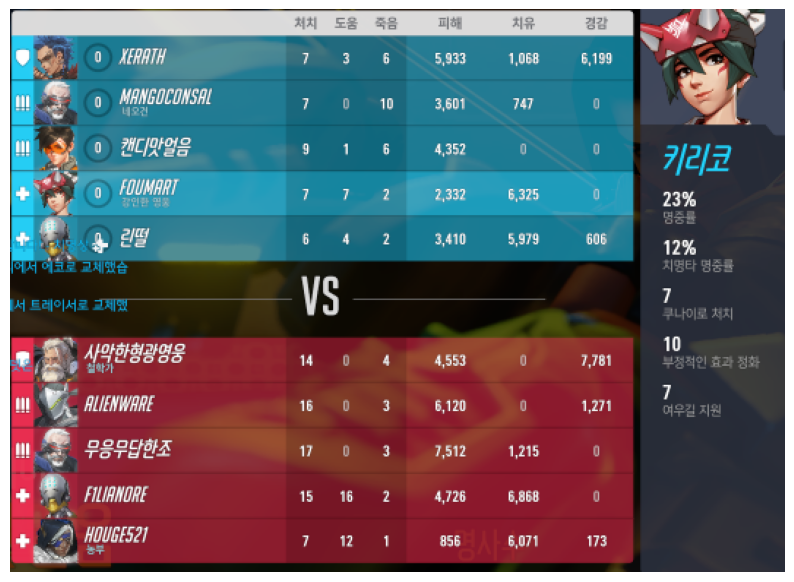

In [6]:
resized = image.resize(cropped, size).numpy().astype('uint8')
plt.figure(figsize=(10, 10))
plt.imshow(resized)
plt.axis('off')